In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, select

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest_date = session.query(func.max(measurement.date)).first()
latest_date

('2017-08-23')

Text(0.5, 0, 'Date')

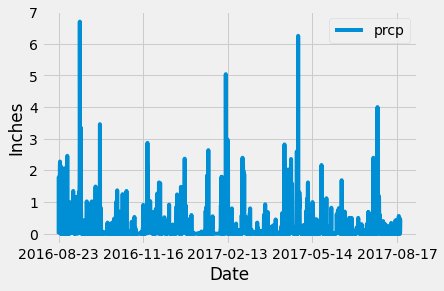

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8 ,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago, measurement.date <= latest_date[0])

# Save the query results as a Pandas DataFrame and set the index to the date column
data_df = pd.DataFrame(data)
data_df = data_df.set_index('date')

# Sort the dataframe by date
data_df = data_df.sort_values(by=['date'])
data_df = data_df.dropna()
data_df
# Use Pandas Plotting with Matplotlib to plot the data

data_plot = data_df.plot()

data_plot.set_ylabel("Inches")
data_plot.set_xlabel("Date")


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
stations_count = session.query(station.station).count()
stations_count

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc())
for stations in active_stations:
    print(stations)
    
most_active = active_stations.first()
print("Most active station: " + most_active[0])

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)
Most active station: USC00519281


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_data = session.query(func.min(measurement.tobs).label('min'),func.max(measurement.tobs).\
                                 label('max'),func.avg(measurement.tobs).label('average')).filter(measurement.station == most_active[0])

print("In order: lowest, highest, average temperatures: " + str(most_active_data[0]))

In order: lowest, highest, average temperatures: (54.0, 85.0, 71.66378066378067)


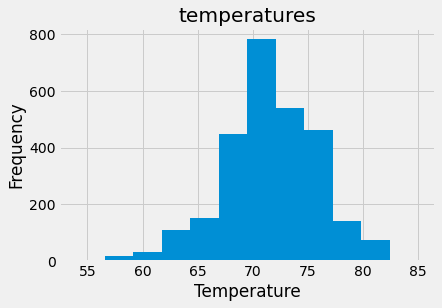

In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_temp = session.query(measurement.tobs).filter(measurement.station == most_active[0])
temp_df = pd.DataFrame(most_active_temp)
temp = temp_df.hist(column='tobs', bins=12)

ax = temp[0]
for x in ax:
    
    x.set_title('temperatures')
    x.set_xlabel('Temperature')
    x.set_ylabel('Frequency')

# Close session

In [ ]:
# Close Session
session.close()